## Yapılacaklar

Bu projede “Cats and Dogs” veri setini kullanarak Transfer Learning ile derin öğrenme modeli eğiteceğiz. Sizden iki farklı notebook dosyası beklenmektedir. Birinci dosyada, verinin önişleme kısmı yapılacak. İkinci dosyada, önceden eğitilmiş bir model, hazırlanan veriler ile tekrar eğitilerek yapay zekâ modeli oluşturulacak. Amacımız herhangi bir accuracy veya loss sonucuna ulaşmak değil; kullanılan yöntemleri öğrenmektir.

Bu çalışma için Google Colab platformunu ve TensorFlow kütüphanesini kullanabilirsiniz.

Google Colab: [https://colab.research.google.com](https://colab.research.google.com)

TensorFlow Doküman: [https://www.tensorflow.org/api_docs/python/tf](https://www.tensorflow.org/api_docs/python/tf)

## 1. Önişleme
  - “Cats and Dogs” veri setini bilgisayarınıza indirin. (786.7MB) [https://www.microsoft.com/en-us/download/details.aspx?id=54765](https://www.microsoft.com/en-us/download/details.aspx?id=54765)
  - Görüntüleri Colab ortamına yükleyin.
  - Görüntüleri sırasıyla okuyarak, hepsini aynı boyuta getirin (resizing), normalizasyon yapın ve her bir görüntüyü etiketiyle birlikte, [görüntü, etiket] formatında bir listeye ekleyin.
  - Oluşturduğunuz listeyi; X_train, y_train, X_val, y_val, X_test ve y_test listelerine bölün.
  - Bu listeleri bilgisayarınıza kaydedin.

## 2. Model Eğitimi
  - Başka bir Colab dosyasında, bilgisayara kaydettiğiniz dosyaları tekrar yükleyin.
  - TensorFlow dokümantasyonunu kullanarak Keras içerisinden bir model seçin ve bu modeli yükleyin.
  - Modeli hazırlamış olduğunuz veriyle eğitin.
  - Model performans metriklerini, loss ve accuracy grafiklerini ekrana yazdırın.

---


In [2]:

#kütüphanelerin yüklenmesi
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


In [32]:
cats_names = os.listdir("PetImages/Cat/")
dogs_names = os.listdir("PetImages/Dog/")

In [ ]:
cats_names = os.listdir("PetImages/Cat/")
dogs_names = os.listdir("PetImages/Dog/")

for f_name in cats_names:
  try:
    path = "PetImages/Cat/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "new_resized/cats." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    continue

In [3]:
# creaing a for loop to assign labels
filenames = os.listdir("new_resized/")

labels = []
input_path = []

for i in range(len(filenames)):
  input_path.append("new_resized/" + filenames[i])
  file_name = filenames[i]
  label = file_name[0:4]

  if label == 'dogs':
    labels.append(0)
  else:
    labels.append(1)


In [108]:
# Unique values
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[]
[]


In [4]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = labels
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,new_resized/cats.11785.jpg,1
1,new_resized/dogs.12496.jpg,0
2,new_resized/cats.7818.jpg,1
3,new_resized/dogs.10091.jpg,0
4,new_resized/dogs.1436.jpg,0


<AxesSubplot:xlabel='label', ylabel='count'>

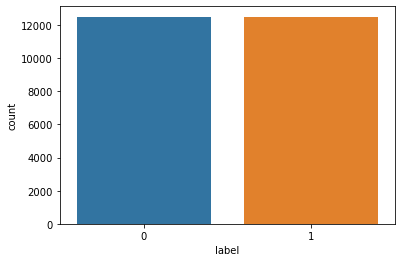

In [116]:
sns.countplot(df['label'])

In [121]:
df['label'] = df['label'].astype('str')
df.head(10)

,images,label
0,new_resized/dogs.2777.jpg,0
1,new_resized/dogs.12238.jpg,0
2,new_resized/dogs.7211.jpg,0
3,new_resized/dogs.8812.jpg,0
4,new_resized/dogs.5936.jpg,0
5,new_resized/dogs.8823.jpg,0
6,new_resized/cats.9525.jpg,1
7,new_resized/dogs.9234.jpg,0
8,new_resized/cats.6549.jpg,1
9,new_resized/cats.4883.jpg,1


In [8]:
# input split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["images"], df["label"], test_size=0.2, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)


## X_train, y_train, X_val, y_val, X_test, y_test